<a href="https://colab.research.google.com/github/curtiscu/LYIT/blob/master/PlayingWithPandasStructures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing datastructures, exploring what's possible

# Setup env


In [0]:
# print all cell output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Google drive access

In [2]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
# test, peek at data
! ls -al '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/'

# test, modules from local  'E:\Google Drive\LYIT\Dissertation\modules'
! ls -al '/content/drive/My Drive/LYIT/Dissertation/modules/'

total 35
-rw------- 1 root root 2589 Apr 27 12:01 10_soul-groove10_102_beat_4-4.mid
-rw------- 1 root root 4793 Apr 27 12:01 1_funk-groove1_138_beat_4-4.mid
-rw------- 1 root root 3243 Apr 27 12:01 2_funk-groove2_105_beat_4-4.mid
-rw------- 1 root root 4466 Apr 27 12:01 3_soul-groove3_86_beat_4-4.mid
-rw------- 1 root root 2551 Apr 27 12:01 4_soul-groove4_80_beat_4-4.mid
-rw------- 1 root root 3798 Apr 27 12:01 5_funk-groove5_84_beat_4-4.mid
-rw------- 1 root root 3760 Apr 27 12:01 6_hiphop-groove6_87_beat_4-4.mid
-rw------- 1 root root 1894 Apr 27 12:01 7_pop-groove7_138_beat_4-4.mid
-rw------- 1 root root 2437 Apr 27 12:01 8_rock-groove8_65_beat_4-4.mid
-rw------- 1 root root 3448 Apr 27 12:01 9_soul-groove9_105_beat_4-4.mid
total 21
-rw------- 1 root root 16580 May 25 20:01 data_prep.py
drwx------ 2 root root  4096 May 10 13:31 __pycache__


## Auto reload module

Now using library code I've created and saved to google drive which is automatically pushed to the cloud and made available to the colab env. The autoreload stuff below should help imports to 'reimport' to load changes to the library code.

It's not the quickest/ most reliable, so if in a hurry, brute force loading of changes by restarting the runtime.

In [0]:
# tool to auto reload modules.
%load_ext autoreload

# config to auto-reload all modules, handy to make 
# writing and testing modules much easier.
%autoreload 2

## Imports and accessing lib functions

In [5]:
# install required libs
!pip install mido

In [6]:
# import my modules
import sys
sys.path.append('/content/drive/My Drive/LYIT/Dissertation/modules/')
import data_prep

LOADING - data_prep.py module name is: data_prep


In [0]:
# imports
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


# object that provides colours for charts
from itertools import cycle



In [8]:
# testing auto reload of modules 
data_prep.test_function_call('bling')

test function called worked! :)  bling


## Pandas display options

In [0]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 2000
    display.max_colwidth = 1000
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()
#pd.reset_option('all')


# Pandas series and dataframe Indexing techniques

Working through some of these...
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- https://github.com/ZaxR/pandas_multiindex_tutorial/blob/master/Pandas%20MultiIndex%20Tutorial.ipynb
- https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [10]:
dates = pd.date_range('1/1/2000', periods=24)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(24,4),
                  index=dates, columns=['A','B', 'C','D'])
df

,A,B,C,D
2000-01-01,1.042353,1.933108,1.562808,0.190957
2000-01-02,2.399004,0.861317,0.484862,-0.152247
2000-01-03,0.442699,-0.209374,-0.618639,-1.006453
2000-01-04,-0.725717,-0.376602,0.671993,-0.066375
2000-01-05,0.076946,0.654258,0.243732,-1.323765
2000-01-06,-0.876272,-1.114183,1.654224,-0.754161
2000-01-07,-0.015374,2.257708,0.782780,-0.591619
2000-01-08,-0.249139,1.049652,-1.401670,1.111867
2000-01-09,-2.879362,0.821094,0.656163,-0.751661
2000-01-10,-0.886972,0.485257,-0.761565,-2.041276


In [12]:
s = df['A']
my_i = 13
print('index {}: {}'.format(my_i, s[dates[my_i]]))
s[:my_i]

index 13: 0.7465275108687762


2000-01-01    1.042353
2000-01-02    2.399004
2000-01-03    0.442699
2000-01-04   -0.725717
2000-01-05    0.076946
2000-01-06   -0.876272
2000-01-07   -0.015374
2000-01-08   -0.249139
2000-01-09   -2.879362
2000-01-10   -0.886972
2000-01-11   -0.185580
2000-01-12   -0.424909
2000-01-13   -0.300387
Freq: D, Name: A, dtype: float64

In [13]:
s[::3]  # select every 3rd element

2000-01-01    1.042353
2000-01-04   -0.725717
2000-01-07   -0.015374
2000-01-10   -0.886972
2000-01-13   -0.300387
2000-01-16   -0.756828
2000-01-19    0.973405
2000-01-22    0.172363
Freq: 3D, Name: A, dtype: float64

In [14]:
# select rows 3 thru 8, not including 8, then
# columns 2 thru 3, not including 3
df.iloc[3:8, 2:3] 

# select rows 3 and 4, column 2
df.iloc[[3,4], [2]]

,C
2000-01-04,0.671993
2000-01-05,0.243732
2000-01-06,1.654224
2000-01-07,0.782780
2000-01-08,-1.401670


,C
2000-01-04,0.671993
2000-01-05,0.243732


In [15]:
df.sample(3)  # select random sample

,A,B,C,D
2000-01-03,0.442699,-0.209374,-0.618639,-1.006453
2000-01-05,0.076946,0.654258,0.243732,-1.323765
2000-01-20,0.830923,1.573103,-0.700432,-0.228649


## Boolean indexing series

This looks pretty powerful...
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing

In [16]:
s = pd.Series(range(-3,4))
s
s[s > 0]
s[(s < -2)|(s>1.8)]

0   -3
1   -2
2   -1
3    0
4    1
5    2
6    3
dtype: int64

4    1
5    2
6    3
dtype: int64

0   -3
5    2
6    3
dtype: int64

## MultiIndex and 'isin' stuff

using Series...

In [17]:
s_mi = pd.Series(np.arange(6),
                           index=pd.MultiIndex.from_product([[0,1], ['a','b','c']]))
s_mi

0  a    0
   b    1
   c    2
1  a    3
   b    4
   c    5
dtype: int64

In [18]:
# this matches on 2 levels of index
s_mi.iloc[s_mi.index.isin([(1,'a'), (0,'c')])]

0  c    2
1  a    3
dtype: int64

In [19]:
# specify index level to test against

# pull out everything with index 'c' at 
# level 1 (i.e. 0, 1, therefore 1 is 
# the second index level)
s_mi.iloc[s_mi.index.isin(['c'], level=1)]

0  c    2
1  c    5
dtype: int64

using DataFrames...

In [20]:
df = pd.DataFrame({'vals': [1,2,3,4], 'ids': ['a','b','f','n'],
                   'ids2': ['a','n','c','n']})
df

# search entire df for list of values
values = ['a','b',1,3]
df.isin(values)

,vals,ids,ids2
0,1,a,a
1,2,b,n
2,3,f,c
3,4,n,n


,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,False
3,False,False,False


In [21]:
# search only specific columns
values = {'ids': ['a','n'], 'vals': [1,4]}
df.isin(values)

,vals,ids,ids2
0,True,True,False
1,False,False,False
2,False,False,False
3,True,True,False


Renaming multiindexes, levels, etc. and whatnot ...

In [22]:
index = pd.MultiIndex.from_product([range(3),['wun','too']], names=['furst', 'secund'])
index

MultiIndex([(0, 'wun'),
            (0, 'too'),
            (1, 'wun'),
            (1, 'too'),
            (2, 'wun'),
            (2, 'too')],
           names=['furst', 'secund'])

In [23]:
print('look at second level index, at [1]: {}'.format(index.levels[1]))
index.set_levels(['x','y','t'], level=1, inplace=True)
index


look at second level index, at [1]: Index(['too', 'wun'], dtype='object', name='secund')


MultiIndex([(0, 'y'),
            (0, 'x'),
            (1, 'y'),
            (1, 'x'),
            (2, 'y'),
            (2, 'x')],
           names=['furst', 'secund'])

## Setting multi/index from columns, resetting

More info here ...
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#set-reset-index


# Setup test file

## Load file

In [0]:
gmt = data_prep.GrooveMidiTools()

In [25]:
file_name = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid'
midi_file = data_prep.MIDI_File_Wrapper(file_name, gmt.mappings)
f = midi_file
f_df = f.df_midi_data

FILE: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid
    tracks: [<midi track 'Base Midi' 1037 messages>]
    time sig: <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
    tempo: <meta message set_tempo tempo=434783 time=0>
    note_on span - first tick: 5 , last tick: 30634 
    good instruments: 4, {36.0: 'Bass Drum 1 (36)', 38.0: 'Acoustic Snare (38)', 42.0: 'Closed Hi Hat (42)', 51.0: 'Ride Cymbal 1 (51)'}


... the above verifies I'm able to create custom objects from custom code, great!


## Setup MIDI event timing bins...

In [26]:
# MTT object for parsing file and
# calculating crticial time metrics
mtt = data_prep.MidiTimingTools(file_name, f.ticks(), f.tempo_us(), f.ts_num(), f.ts_denom(), f.last_hit())

# values needed these for making MultiIndex later
quantize_level = mtt.bins_per_bar()
bars_in_file = mtt.bars_in_file()
tp_beat = mtt.ts_ticks_per_beat()
tp_bin = mtt.bin_size()

print('bar info - bars in file: {}, bar quantize level: {}'.format(bars_in_file, quantize_level))
print('tick info - ticks per time sig beat: {}, ticks per quantize bin: {}'.format(tp_beat, tp_bin))

# capture timing data from MidiTimingTools in df...
beats_col, offsets_col = mtt.get_offsets(f_df[f.cum_ticks_col])
f_df['beat_offset'] = offsets_col
f_df['beat_center'] = beats_col
f_df['file_beat_number'] = pd.Categorical(f_df.beat_center).codes

f_df.head(20)

bar info - bars in file: 16, bar quantize level: 16.0
tick info - ticks per time sig beat: 480.0, ticks per quantize bin: 120


,msg_type,delta_ticks,total_ticks,total_seconds,note,velocity,raw_data,beat_offset,beat_center,file_beat_number
0,track_name,0,0,0.000000,NaN,NaN,"{'type': 'track_name', 'name': 'Base Midi', 'time': 0}",0,0,0
1,instrument_name,0,0,0.000000,NaN,NaN,"{'type': 'instrument_name', 'name': 'Brooklyn', 'time': 0}",0,0,0
2,time_signature,0,0,0.000000,NaN,NaN,"{'type': 'time_signature', 'numerator': 4, 'denominator': 4, 'clocks_per_click': 24, 'notated_32nd_notes_per_beat': 8, 'time': 0}",0,0,0
3,key_signature,0,0,0.000000,NaN,NaN,"{'type': 'key_signature', 'key': 'C', 'time': 0}",0,0,0
4,smpte_offset,0,0,0.000000,NaN,NaN,"{'type': 'smpte_offset', 'frame_rate': 24, 'hours': 33, 'minutes': 1, 'seconds': 15, 'frames': 16, 'sub_frames': 24, 'time': 0}",0,0,0
5,set_tempo,0,0,0.000000,NaN,NaN,"{'type': 'set_tempo', 'tempo': 434783, 'time': 0}",0,0,0
6,control_change,4,4,0.003623,NaN,NaN,"{'type': 'control_change', 'time': 4, 'control': 4, 'value': 77, 'channel': 9}",4,0,0
7,note_on,1,5,0.004529,42.0,55.0,"{'type': 'note_on', 'time': 1, 'note': 44, 'velocity': 55, 'channel': 9}",5,0,0
8,note_on,4,9,0.008152,36.0,39.0,"{'type': 'note_on', 'time': 4, 'note': 36, 'velocity': 39, 'channel': 9}",9,0,0
9,note_on,6,15,0.013587,51.0,67.0,"{'type': 'note_on', 'time': 6, 'note': 51, 'velocity': 67, 'channel': 9}",15,0,0


In [27]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   msg_type          1037 non-null   string  
 1   delta_ticks       1037 non-null   int64   
 2   total_ticks       1037 non-null   int64   
 3   total_seconds     1037 non-null   float64 
 4   note              746 non-null    float64 
 5   velocity          746 non-null    float64 
 6   raw_data          1037 non-null   string  
 7   beat_offset       1037 non-null   int64   
 8   beat_center       1037 non-null   category
 9   file_beat_number  1037 non-null   int16   
dtypes: category(1), float64(3), int16(1), int64(3), string(2)
memory usage: 69.1 KB


## Setup columns indicating bars & beats

These new columns will be needed for the new MultiIndex that needs to be created

In [0]:
# make a copy, just to practice on 
tmp_df = f_df.copy(deep=True)

In [0]:
# add column for bear index
tmp_df['bar_number'] = (tmp_df.file_beat_number // quantize_level) + 1

In [0]:
# add column for beat within the bar index
tmp_df['bar_beat_number'] = (tmp_df.file_beat_number % 16) + 1

In [0]:
# sort out types
tmp_df['bar_number'] = tmp_df['bar_number'].astype('int')
tmp_df['bar_beat_number'] = tmp_df['bar_beat_number'].astype('int')

#tmp_df['bar_number'] = tmp_df['bar_number'].astype('str') 
#tmp_df['bar_beat_number'] = tmp_df['bar_beat_number'].astype('str') 

In [0]:
# filter to only note_on events
tmp_df = tmp_df[tmp_df['msg_type'] == 'note_on'].copy() 


In [33]:
# test for presence of column
col_test = ['msg_type', 'plop', 'note']
for next in col_test:
  print('{} : {}'.format(next, next in tmp_df))



msg_type : True
plop : False
note : True


In [34]:
tmp_df.info()
tmp_df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 7 to 1034
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   msg_type          373 non-null    string  
 1   delta_ticks       373 non-null    int64   
 2   total_ticks       373 non-null    int64   
 3   total_seconds     373 non-null    float64 
 4   note              373 non-null    float64 
 5   velocity          373 non-null    float64 
 6   raw_data          373 non-null    string  
 7   beat_offset       373 non-null    int64   
 8   beat_center       373 non-null    category
 9   file_beat_number  373 non-null    int16   
 10  bar_number        373 non-null    int64   
 11  bar_beat_number   373 non-null    int64   
dtypes: category(1), float64(3), int16(1), int64(5), string(2)
memory usage: 33.6 KB


,msg_type,delta_ticks,total_ticks,total_seconds,note,velocity,raw_data,beat_offset,beat_center,file_beat_number,bar_number,bar_beat_number
7,note_on,1,5,0.004529,42.0,55.0,"{'type': 'note_on', 'time': 1, 'note': 44, 'velocity': 55, 'channel': 9}",5,0,0,1,1
8,note_on,4,9,0.008152,36.0,39.0,"{'type': 'note_on', 'time': 4, 'note': 36, 'velocity': 39, 'channel': 9}",9,0,0,1,1
9,note_on,6,15,0.013587,51.0,67.0,"{'type': 'note_on', 'time': 6, 'note': 51, 'velocity': 67, 'channel': 9}",15,0,0,1,1
14,note_on,100,226,0.204710,36.0,41.0,"{'type': 'note_on', 'time': 100, 'note': 36, 'velocity': 41, 'channel': 9}",-14,240,2,1,3
15,note_on,32,258,0.233696,51.0,58.0,"{'type': 'note_on', 'time': 32, 'note': 51, 'velocity': 58, 'channel': 9}",18,240,2,1,3
18,note_on,7,344,0.311594,36.0,6.0,"{'type': 'note_on', 'time': 7, 'note': 36, 'velocity': 6, 'channel': 9}",-16,360,3,1,4
23,note_on,0,478,0.432971,42.0,67.0,"{'type': 'note_on', 'time': 0, 'note': 44, 'velocity': 67, 'channel': 9}",-2,480,4,1,5
24,note_on,17,495,0.448370,51.0,119.0,"{'type': 'note_on', 'time': 17, 'note': 51, 'velocity': 119, 'channel': 9}",15,480,4,1,5
26,note_on,0,513,0.464674,38.0,106.0,"{'type': 'note_on', 'time': 0, 'note': 40, 'velocity': 106, 'channel': 9}",33,480,4,1,5
30,note_on,122,746,0.675725,51.0,45.0,"{'type': 'note_on', 'time': 122, 'note': 51, 'velocity': 45, 'channel': 9}",26,720,6,1,7


## Drop other columns we don't need

In [0]:
tmp_df.drop(columns=['msg_type', 'delta_ticks', 'total_seconds',  'raw_data', 'file_beat_number' ], inplace=True)

In [36]:
tmp_df.head()


,total_ticks,note,velocity,beat_offset,beat_center,bar_number,bar_beat_number
7,5,42.0,55.0,5,0,1,1
8,9,36.0,39.0,9,0,1,1
9,15,51.0,67.0,15,0,1,1
14,226,36.0,41.0,-14,240,1,3
15,258,51.0,58.0,18,240,1,3


# Set bar & beat MultiIndex

In [0]:
tmp_df_no_index = tmp_df.copy()  # save a copy for later
tmp_df.set_index(['bar_number', 'bar_beat_number'], inplace=True)

In [38]:
tmp_df.index.names

FrozenList(['bar_number', 'bar_beat_number'])

In [39]:
tmp_df.head()
tmp_df.info()

total_ticks  note  velocity  beat_offset  \
bar_number bar_beat_number                                             
1          1                          5  42.0      55.0            5   
           1                          9  36.0      39.0            9   
           1                         15  51.0      67.0           15   
           3                        226  36.0      41.0          -14   
           3                        258  51.0      58.0           18   

                           beat_center  
bar_number bar_beat_number              
1          1                         0  
           1                         0  
           1                         0  
           3                       240  
           3                       240

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 373 entries, (1, 1) to (16, 16)
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   total_ticks  373 non-null    int64   
 1   note         373 non-null    float64 
 2   velocity     373 non-null    float64 
 3   beat_offset  373 non-null    int64   
 4   beat_center  373 non-null    category
dtypes: category(1), float64(2), int64(2)
memory usage: 13.6 KB


## Test data selection methods

In [40]:
# select everything in bar #1
tmp_df.loc[1]

,total_ticks,note,velocity,beat_offset,beat_center
bar_beat_number,,,,,
1,5,42.0,55.0,5,0
1,9,36.0,39.0,9,0
1,15,51.0,67.0,15,0
3,226,36.0,41.0,-14,240
3,258,51.0,58.0,18,240
4,344,36.0,6.0,-16,360
5,478,42.0,67.0,-2,480
5,495,51.0,119.0,15,480
5,513,38.0,106.0,33,480


In [41]:
# select hits in 5th beat, first bar
# .loc in this case only works for leftmost index such
# that if there is no match with anything in left most
# index it will throw an error. 
tmp_df.loc[1].loc[5]

,total_ticks,note,velocity,beat_offset,beat_center
bar_beat_number,,,,,
5,478,42.0,67.0,-2,480
5,495,51.0,119.0,15,480
5,513,38.0,106.0,33,480


In [42]:
# more selection mechanisms...
#tmp_df.xs(1)
tmp_df.loc[1].loc[1]

# NOTE: the below will FAIL if integer given
# in 2nd 'loc' doesn't exist in result set!!!
tmp_df.loc[1].loc[3, ( 'note', 'beat_offset')] 

,total_ticks,note,velocity,beat_offset,beat_center
bar_beat_number,,,,,
1,5,42.0,55.0,5,0
1,9,36.0,39.0,9,0
1,15,51.0,67.0,15,0


,note,beat_offset
bar_beat_number,,
3,36.0,-14
3,51.0,18


In [43]:
# selects bars 3-4
tmp_df.loc[3:4]

total_ticks  note  velocity  beat_offset  \
bar_number bar_beat_number                                             
3          1                       3846  51.0      68.0            6   
           1                       3849  36.0      43.0            9   
           1                       3852  42.0      62.0           12   
           2                       3977  38.0      32.0           17   
           3                       4073  36.0      46.0           -7   
           3                       4075  51.0      52.0           -5   
           4                       4162  36.0       6.0          -38   
           5                       4303  42.0      70.0          -17   
           5                       4337  51.0     107.0           17   
           5                       4346  38.0     127.0           26   
           7                       4579  51.0      46.0           19   
           8                       4695  38.0      30.0           15   
           9                       4820  51.0      55.0           20   
           9                       4823  42.0      65.0           23   
           10                      4949  38.0      36.0           29   
           11                      5049  36.0      48.0            9   
           11                      5059  51.0      83.0           19   
           12                      5112  36.0      16.0          -48   
           12                      5143  38.0       9.0          -17   
           12                      5161  36.0       6.0            1   
           12                      5181  38.0       9.0           21   
           13                      5281  42.0      70.0            1   
           13                      5306  51.0      44.0           26   
           15                      5540  51.0     120.0           20   
           15                      5545  38.0     126.0           25   
4          1                       5767  51.0      43.0            7   
           1                       5781  42.0      62.0           21   
           2                       5874  38.0      50.0           -6   
           3                       5994  36.0      28.0           -6   
           3                       6024  51.0      69.0           24   
           4                       6121  36.0      40.0            1   
           5                       6197  42.0      50.0          -43   
           5                       6240  51.0     106.0            0   
           5                       6245  38.0     107.0            5   
           6                       6351  38.0      39.0           -9   
           7                       6486  51.0      45.0            6   
           8                       6595  38.0      57.0           -5   
           9                       6722  42.0      57.0            2   
           9                       6725  51.0      84.0            5   
           9                       6727  36.0      42.0            7   
           10                      6842  38.0      55.0            2   
           11                      6961  51.0      58.0            1   
           11                      6978  36.0      12.0           18   
           12                      7043  36.0      17.0          -37   
           13                      7194  42.0      80.0           -6   
           13                      7202  51.0      76.0            2   
           15                      7426  51.0     116.0          -14   
           15                      7435  38.0     117.0           -5   

                           beat_center  
bar_number bar_beat_number              
3          1                      3840  
           1                      3840  
           1                      3840  
           2                      3960  
           3                      4080  
           3                      4080  
           4                      4200  
           5                      4320  
           5     

In [44]:
tmp_df.index.names

FrozenList(['bar_number', 'bar_beat_number'])

In [45]:
# extract all notes in the first 1/16th note of a bar
# NOTE: 'level' refers to index, level 0 = bar_number, level 1 = bar_beat_number
tmp_df[tmp_df.index.isin([1], level=1)]

total_ticks  note  velocity  beat_offset  \
bar_number bar_beat_number                                             
1          1                          5  42.0      55.0            5   
           1                          9  36.0      39.0            9   
           1                         15  51.0      67.0           15   
2          1                       1935  51.0      67.0           15   
           1                       1938  36.0      43.0           18   
           1                       1944  42.0      62.0           24   
3          1                       3846  51.0      68.0            6   
           1                       3849  36.0      43.0            9   
           1                       3852  42.0      62.0           12   
4          1                       5767  51.0      43.0            7   
           1                       5781  42.0      62.0           21   
5          1                       7649  42.0      47.0          -31   
           1                       7658  36.0      41.0          -22   
           1                       7663  51.0      61.0          -17   
6          1                       9589  36.0      45.0          -11   
           1                       9591  51.0      74.0           -9   
           1                       9593  42.0      70.0           -7   
7          1                      11516  42.0      67.0           -4   
           1                      11524  51.0      69.0            4   
           1                      11527  36.0      41.0            7   
8          1                      13431  51.0      42.0           -9   
           1                      13455  42.0      57.0           15   
9          1                      15353  42.0      72.0           -7   
           1                      15372  36.0      43.0           12   
           1                      15384  51.0     107.0           24   
10         1                      17285  42.0      50.0            5   
           1                      17287  36.0      41.0            7   
           1                      17288  51.0      74.0            8   
11         1                      19210  36.0      40.0           10   
           1                      19210  42.0      62.0           10   
           1                      19220  51.0      64.0           20   
12         1                      21152  51.0      40.0           32   
           1                      21168  42.0      60.0           48   
13         1                      23012  42.0      52.0          -28   
           1                      23019  51.0      51.0          -21   
           1                      23021  36.0      41.0          -19   
14         1                      24967  42.0      65.0            7   
           1                      24977  36.0      44.0           17   
           1                      24978  51.0      70.0           18   
15         1                      26894  36.0      43.0           14   
           1                      26897  42.0      62.0           17   
           1                      26903  51.0      72.0           23   
16         1                      28808  42.0      55.0            8   
           1                      28811  36.0      42.0           11   
           1                      28819  51.0      67.0           19   

                           beat_center  
bar_number bar_beat_number              
1          1                         0  
           1                         0  
           1                         0  
2          1                      1920  
           1                      1920  
           1                      1920  
3          1                      3840  
           1                      3840  
           1                      3840  
4          1                      5760  
           1                      5760  
5          1                      7680  
           1                      7680  
           1                

In [46]:
# extract all notes in the first 1/16th note of a bar
# NOTE: 'level' refers to index, level 0 = bar_number, level 1 = bar_beat_number

# all I've changed from the last cell is the level, this now
# selects every note played in the first bar, and is actually 
# a bit verbose, as same can be managed with -> tmp_df.loc[1]
tmp_df[tmp_df.index.isin([1], level=0)]

total_ticks  note  velocity  beat_offset  \
bar_number bar_beat_number                                             
1          1                          5  42.0      55.0            5   
           1                          9  36.0      39.0            9   
           1                         15  51.0      67.0           15   
           3                        226  36.0      41.0          -14   
           3                        258  51.0      58.0           18   
           4                        344  36.0       6.0          -16   
           5                        478  42.0      67.0           -2   
           5                        495  51.0     119.0           15   
           5                        513  38.0     106.0           33   
           7                        746  51.0      45.0           26   
           8                        863  38.0      50.0           23   
           9                        991  42.0      67.0           31   
           9                        996  51.0      53.0           36   
           10                      1116  38.0      55.0           36   
           11                      1195  36.0      15.0           -5   
           11                      1236  51.0      59.0           36   
           12                      1314  36.0      34.0           -6   
           13                      1460  42.0      67.0           20   
           13                      1465  51.0      96.0           25   
           13                      1468  38.0     103.0           28   
           15                      1702  51.0      38.0           22   
           16                      1808  38.0      56.0            8   

                           beat_center  
bar_number bar_beat_number              
1          1                         0  
           1                         0  
           1                         0  
           3                       240  
           3                       240  
           4                       360  
           5                       480  
           5                       480  
           5                       480  
           7                       720  
           8                       840  
           9                       960  
           9                       960  
           10                     1080  
           11                     1200  
           11                     1200  
           12                     1320  
           13                     1440  
           13                     1440  
           13                     1440  
           15                     1680  
           16                     1800

In [47]:
# extract all notes in some 1/16th note of a bar
# NOTE: 'level' refers to index, level 0 = bar_number, level 1 = bar_beat_number

# this will select all notes played in 6th or 16th note
# of every bar in the MIDI file ...
tmp_df[tmp_df.index.isin([6, 16], level=1)]

,,total_ticks,note,velocity,beat_offset,beat_center
bar_number,bar_beat_number,,,,,
1,16,1808,38.0,56.0,8,1800
2,16,3711,38.0,38.0,-9,3720
4,6,6351,38.0,39.0,-9,6360
5,16,9472,38.0,51.0,-8,9480
6,16,11391,38.0,53.0,-9,11400
7,16,13288,38.0,28.0,-32,13320
8,16,15266,38.0,85.0,26,15240
9,16,17167,38.0,46.0,7,17160
10,16,19100,38.0,48.0,20,19080


# Add 'note' column indexes

In [0]:
# create copy of original data to test work on
tmp_df_2 = tmp_df_no_index.copy()

In [0]:

# tmp_df_2.set_index(['bar_number', 'bar_beat_number', 'note'], inplace=True, append=True)

tmp_df_2.set_index(['bar_number', 'bar_beat_number', 'note'], inplace=True, append=True, drop=False)

In [50]:
tmp_df_2.index.names

FrozenList([None, 'bar_number', 'bar_beat_number', 'note'])

In [51]:
tmp_df_2.info()
tmp_df_2.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 373 entries, (7, 1, 1, 42.0) to (1034, 16, 16, 38.0)
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   total_ticks      373 non-null    int64   
 1   note             373 non-null    float64 
 2   velocity         373 non-null    float64 
 3   beat_offset      373 non-null    int64   
 4   beat_center      373 non-null    category
 5   bar_number       373 non-null    int64   
 6   bar_beat_number  373 non-null    int64   
dtypes: category(1), float64(2), int64(4)
memory usage: 23.6 KB


,,,,total_ticks,note,velocity,beat_offset,beat_center,bar_number,bar_beat_number
,bar_number,bar_beat_number,note,,,,,,,
7,1,1,42.0,5,42.0,55.0,5,0,1,1
8,1,1,36.0,9,36.0,39.0,9,0,1,1
9,1,1,51.0,15,51.0,67.0,15,0,1,1
14,1,3,36.0,226,36.0,41.0,-14,240,1,3
15,1,3,51.0,258,51.0,58.0,18,240,1,3


In [52]:
tmp_df_2.iloc[1:10, 0:2]

,,,,total_ticks,note
,bar_number,bar_beat_number,note,,
8,1,1,36.0,9,36.0
9,1,1,51.0,15,51.0
14,1,3,36.0,226,36.0
15,1,3,51.0,258,51.0
18,1,4,36.0,344,36.0
23,1,5,42.0,478,42.0
24,1,5,51.0,495,51.0
26,1,5,38.0,513,38.0
30,1,7,51.0,746,51.0


In [0]:
# make indexes back into columns
#
# NOTE: this only works if set_index was used
# with 'drop=True' (default), but I've used
#
# tmp_df_2.reset_index().head()

## Selecting index data with 'isin'

This is critical to working with these MultiIndex objects ...
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-with-isin

In [54]:
# pull out all notes played on nth 16th note of a bar
selected_16th = 2
tmp_df_2[tmp_df_2.index.isin([selected_16th], level='bar_beat_number')]


,,,,total_ticks,note,velocity,beat_offset,beat_center,bar_number,bar_beat_number
,bar_number,bar_beat_number,note,,,,,,,
74,2,2,38.0,2051,38.0,40.0,11,2040,2,2
137,3,2,38.0,3977,38.0,32.0,17,3960,3,2
200,4,2,38.0,5874,38.0,50.0,-6,5880,4,2
269,5,2,38.0,7776,38.0,39.0,-24,7800,5,2
270,5,2,38.0,7840,38.0,17.0,40,7800,5,2
332,6,2,38.0,9724,38.0,36.0,4,9720,6,2
396,7,2,38.0,11642,38.0,36.0,2,11640,7,2
457,8,2,38.0,13557,38.0,44.0,-3,13560,8,2
586,10,2,38.0,17395,38.0,31.0,-5,17400,10,2


In [55]:
# show number of unique instruments/ notes in file
instr_idx = tmp_df_2.index.unique(level=3)
print('unique instruments: {}'.format(instr_idx))
instr_idx._data


unique instruments: Float64Index([42.0, 36.0, 51.0, 38.0], dtype='float64', name='note')


array([42., 36., 51., 38.])

In [56]:
# this didn't quite work out the way I wanted ...
tmp_df_2.unstack(level='note').head(10)

total_ticks                       note        \
note                                 36.0   38.0   42.0   51.0  36.0  38.0   
   bar_number bar_beat_number                                                
7  1          1                       NaN    NaN    5.0    NaN   NaN   NaN   
8  1          1                       9.0    NaN    NaN    NaN  36.0   NaN   
9  1          1                       NaN    NaN    NaN   15.0   NaN   NaN   
14 1          3                     226.0    NaN    NaN    NaN  36.0   NaN   
15 1          3                       NaN    NaN    NaN  258.0   NaN   NaN   
18 1          4                     344.0    NaN    NaN    NaN  36.0   NaN   
23 1          5                       NaN    NaN  478.0    NaN   NaN   NaN   
24 1          5                       NaN    NaN    NaN  495.0   NaN   NaN   
26 1          5                       NaN  513.0    NaN    NaN   NaN  38.0   
30 1          7                       NaN    NaN    NaN  746.0   NaN   NaN   

                                          velocity                      \
note                           42.0  51.0     36.0   38.0  42.0   51.0   
   bar_number bar_beat_number                                            
7  1          1                42.0   NaN      NaN    NaN  55.0    NaN   
8  1          1                 NaN   NaN     39.0    NaN   NaN    NaN   
9  1          1                 NaN  51.0      NaN    NaN   NaN   67.0   
14 1          3                 NaN   NaN     41.0    NaN   NaN    NaN   
15 1          3                 NaN  51.0      NaN    NaN   NaN   58.0   
18 1          4                 NaN   NaN      6.0    NaN   NaN    NaN   
23 1          5                42.0   NaN      NaN    NaN  67.0    NaN   
24 1          5                 NaN  51.0      NaN    NaN   NaN  119.0   
26 1          5                 NaN   NaN      NaN  106.0   NaN    NaN   
30 1          7                 NaN  51.0      NaN    NaN   NaN   45.0   

                              beat_offset                  beat_center       \
note                                 36.0  38.0 42.0  51.0        36.0 38.0   
   bar_number bar_beat_number                                                 
7  1          1                       NaN   NaN  5.0   NaN         NaN  NaN   
8  1          1                       9.0   NaN  NaN   NaN           0  NaN   
9  1          1                       NaN   NaN  NaN  15.0         NaN  NaN   
14 1          3                     -14.0   NaN  NaN   NaN         240  NaN   
15 1          3                       NaN   NaN  NaN  18.0         NaN  NaN   
18 1          4                     -16.0   NaN  NaN   NaN         360  NaN   
23 1          5                       NaN   NaN -2.0   NaN         NaN  NaN   
24 1          5                       NaN   NaN  NaN  15.0         NaN  NaN   
26 1          5                       NaN  33.0  NaN   NaN         NaN  480   
30 1          7                       NaN   NaN  NaN  26.0         NaN  NaN   

                                        bar_number                 \
note                          42.0 51.0       36.0 38.0 42.0 51.0   
   bar_number bar_beat_number                                       
7  1          1                  0  NaN        NaN  NaN  1.0  NaN   
8  1          1                NaN  NaN        1.0  NaN  NaN  NaN   
9  1          1                NaN    0        NaN  NaN  NaN  1.0   
14 1          3                NaN  NaN        1.0  NaN  NaN  NaN   
15 1          3                NaN  240        NaN  NaN  NaN  1.0   
18 1          4                NaN  NaN        1.0  NaN  NaN  NaN   
23 1          5                480  NaN        NaN  NaN  1.0  NaN   
24 1          5                NaN  480        NaN  NaN  NaN  1.0   
26 1          5                NaN  NaN        NaN  1.0  NaN  NaN   
30 1          7                NaN  720        NaN  NaN  NaN  1.0   

                              bar_beat_number                 
note                                     36.0 38.0 42.0 51.0  


# EDA (Exploratory Data Analysis)

## Pull out some info on notes etc.


In [57]:
# pull out all notes played on nth 16th note of a bar
selected_16th = 2
# tmp_df_2[tmp_df_2.index.isin([selected_16th], level='bar_beat_number')]

tmp_df_2.index.names

FrozenList([None, 'bar_number', 'bar_beat_number', 'note'])

In [58]:
# this shows list of all values used
# in index...
tmp_df_2.index.get_level_values(3).unique()


Float64Index([42.0, 36.0, 51.0, 38.0], dtype='float64', name='note')

In [59]:
# this also shows list of unique notes, we 
# can only do this as when the index was 
# created from the column, column was kept.
tmp_df_2.note.unique()

array([42., 36., 51., 38.])

## Histograms - all notes/ instruments in a song

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedda464320>,
      dtype=object)

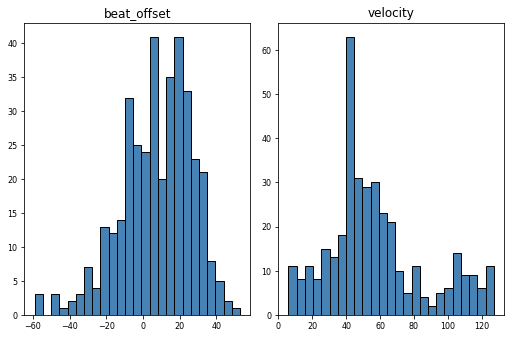

In [60]:
tmp_df_2.hist(column=['beat_offset', 'velocity'], bins=25, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

## Histograms - all instruments in a song, upbeats vs. downbeats

In [0]:
downs = list(range(1, 16, 2))
ups = list(range(2, 16, 2))
downbeats = tmp_df_2[tmp_df_2.index.isin(downs, level='bar_beat_number')]
upbeats = tmp_df_2[tmp_df_2.index.isin(ups, level='bar_beat_number')]

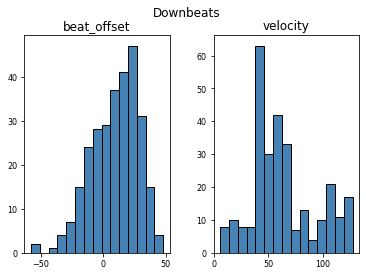

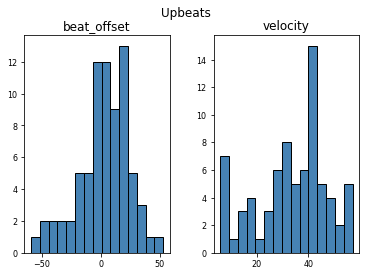

In [62]:
_ = downbeats.hist(column=['beat_offset', 'velocity'], bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
_ = plt.suptitle('Downbeats');
plt.show();

_ = upbeats.hist(column=['beat_offset', 'velocity'], bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
_ = plt.suptitle('Upbeats');
plt.show();

## Histograms - separate instruments in a song

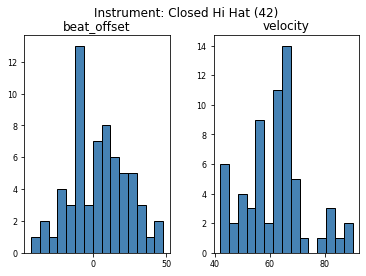

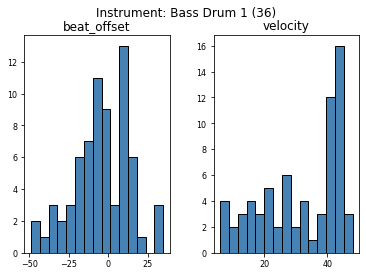

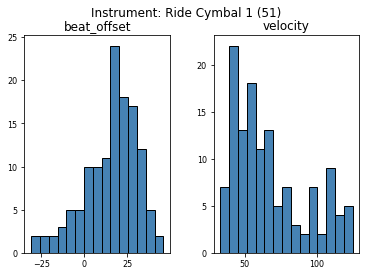

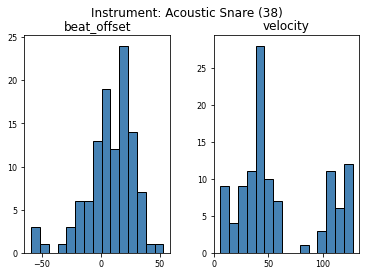

In [63]:
for i in tmp_df_2.note.unique():
  _ = tmp_df_2[tmp_df_2['note'] == i].hist(column=['beat_offset', 'velocity'], bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False);
  _ = plt.suptitle('Instrument: {}'.format(data_prep.MidiTools.mapInstrument(i)));
  plt.show();
  

Boxplotting